# l'objectif

l'objective de ce projet est de crier une application en deep learning.

qui permet la prediction de l'age à partir d'une image.

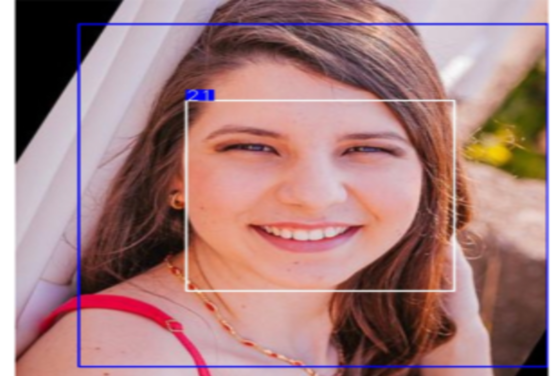

In [1]:
import os 
from pathlib import Path
import numpy as np 
import pandas as pd
import seaborn as sns
import cv2
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNet
import tensorflow.keras.layers as L
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm as log_progress
from tensorflow.keras.models import load_model

# Collection des données

In [2]:
image_dir = Path('20-50')
image_dir

WindowsPath('20-50')

# Nettoyage des données

### Crier un fichier DataFrame

In [3]:
filepaths = pd.Series(list(image_dir.glob(r'**/*.jpg')), name='Filepath').astype(str)
print(filepaths)
# print(filepaths.apply(lambda x: os.path.split(os.path.split(x)[0])))
ages = pd.Series(filepaths.apply(lambda x: os.path.split(os.path.split(x)[0])[1]), name='Age').astype(str)

df = pd.concat([filepaths, ages], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

0         20-50\test\20\28492.jpg
1         20-50\test\20\28521.jpg
2         20-50\test\20\28681.jpg
3         20-50\test\20\28801.jpg
4         20-50\test\20\28815.jpg
                   ...           
40435    20-50\train\50\99814.jpg
40436    20-50\train\50\99819.jpg
40437    20-50\train\50\99907.jpg
40438    20-50\train\50\99983.jpg
40439    20-50\train\50\99988.jpg
Name: Filepath, Length: 40440, dtype: object


In [4]:
ages

0        20
1        20
2        20
3        20
4        20
         ..
40435    50
40436    50
40437    50
40438    50
40439    50
Name: Age, Length: 40440, dtype: object

In [5]:
df

,Filepath,Age
0,20-50\test\33\42338.jpg,33
1,20-50\train\30\143701.jpg,30
2,20-50\train\40\154725.jpg,40
3,20-50\train\32\179320.jpg,32
4,20-50\train\22\149606.jpg,22
...,...,...
40435,20-50\train\20\171263.jpg,20
40436,20-50\train\43\154318.jpg,43
40437,20-50\test\42\38706.jpg,42
40438,20-50\train\24\160373.jpg,24


In [6]:
#print the unique elements
df["Age"].unique()

array(['33', '30', '40', '32', '22', '38', '39', '31', '48', '24', '41',
       '21', '47', '44', '34', '26', '43', '49', '45', '36', '46', '27',
       '25', '28', '50', '42', '23', '37', '20', '35', '29'], dtype=object)

In [7]:
#select classes 
options = df["Age"].unique()

#select rows that have the classname as either 
train = df[df["Age"].isin(options)].reset_index(drop=True)
train.sort_values("Filepath", axis=0, inplace=True)


# Analyse exploratoire des données

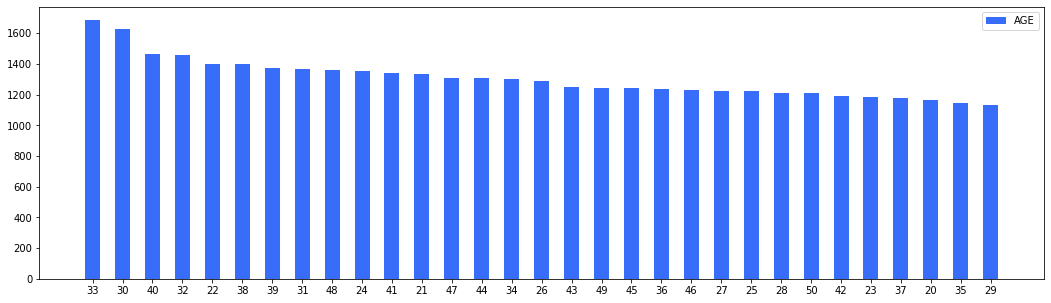

In [8]:
#plotting a bar plot 
sns.set_palette('rainbow')
f, ax = plt.subplots(figsize=(18,5))
x_axis_val = options
y_axis_val = train.Age.value_counts()
plt.bar(x_axis_val,y_axis_val,width=0.5,label='AGE')
# sns.countplot()
ax.legend()

In [9]:
im = df['Filepath']
def format_image(path):
    
    img = cv2.imread(path)
    img = cv2.resize(img,(128,128))
    print('formatted')
    
    return img

In [10]:
# labels= images['Age']
labels=np.array([float(age) for age in df['Age']])
labels

array([33., 30., 40., ..., 42., 24., 43.])

In [11]:
# imPixels = pd.Series(list(format_image(path) for path in im), name='pixel')
# print(imPixels)

In [1]:
# datacsv = pd.concat([filepaths, ages], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)
# datacsv['pixels'] = datacsv['Filepath'].apply(format_image)
# datacsv.to_csv('data.csv',index=False)

In [35]:
# datacsv['pixels']

0        [[[29, 42, 58], [29, 42, 58], [25, 40, 56], [2...
1        [[[24, 29, 30], [24, 29, 30], [23, 28, 29], [2...
2        [[[1, 1, 1], [1, 1, 1], [5, 1, 0], [5, 0, 1], ...
3        [[[31, 72, 111], [26, 65, 103], [18, 55, 89], ...
4        [[[110, 112, 122], [110, 112, 122], [109, 111,...
                               ...                        
40435    [[[85, 149, 107], [84, 148, 106], [85, 152, 10...
40436    [[[18, 11, 44], [18, 11, 44], [18, 12, 47], [1...
40437    [[[34, 0, 11], [33, 1, 12], [33, 1, 12], [31, ...
40438    [[[28, 18, 31], [27, 17, 30], [32, 18, 30], [3...
40439    [[[35, 33, 39], [36, 34, 40], [35, 33, 39], [3...
Name: pixels, Length: 40440, dtype: object

In [58]:
# datacsv.to_csv('data.csv',index="False")

In [13]:
data = np.array([format_image(path) for path in im])

formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted
formatted


In [14]:
data

array([[[[ 29,  42,  58],
         [ 29,  42,  58],
         [ 25,  40,  56],
         ...,
         [ 36,  59,  75],
         [ 35,  58,  74],
         [ 33,  56,  72]],

        [[ 33,  46,  62],
         [ 31,  44,  60],
         [ 27,  42,  58],
         ...,
         [ 35,  58,  74],
         [ 32,  55,  71],
         [ 30,  53,  69]],

        [[ 28,  41,  57],
         [ 29,  42,  58],
         [ 29,  44,  60],
         ...,
         [ 31,  54,  70],
         [ 29,  52,  68],
         [ 32,  55,  71]],

        ...,

        [[ 10,  21,  35],
         [  7,  18,  32],
         [ 13,  22,  36],
         ...,
         [ 19,  20,  18],
         [ 13,  14,  12],
         [  9,  10,   8]],

        [[ 11,  22,  36],
         [ 10,  21,  35],
         [ 13,  22,  36],
         ...,
         [  2,   3,   1],
         [  4,   5,   3],
         [  5,   6,   4]],

        [[ 10,  21,  35],
         [ 12,  23,  37],
         [ 13,  22,  36],
         ...,
         [  0,   1,   0],
        

In [15]:
train_x,test_x,train_y,test_y = train_test_split(data,labels,test_size=0.2)


In [16]:
len(test_x)


8088

In [17]:
len(train_x)

32352

In [18]:
train_x[0].shape

(128, 128, 3)

In [19]:
len(train_x) + len(test_x)

40440

In [20]:
len(train_y)

32352

In [21]:
train_y

array([32., 41., 46., ..., 20., 38., 46.])

# Construction du modèle

In [22]:
# inputs = tf.keras.Input(shape=(120, 120, 3))
model = Sequential([
              MobileNet(input_shape=(128,128,3),
                            include_top=False,
                            pooling='avg',
                            weights='imagenet'),
                            L.Dense(1)])
# L.Conv2D(filters=16, input_shape=(128,128,3),padding = "Same",kernel_size=(5, 5), activation='relu'),
# L.Conv2D(140,(3,3),activation="relu"),
#     L.Conv2D(130,(3,3),activation="relu"),
#     L.BatchNormalization(),
#     L.MaxPool2D(2,2),
#     L.Conv2D(120,(3,3),activation="relu"),
#     L.BatchNormalization(),
#     L.MaxPool2D((2,2)),
#     L.Conv2D(120,(3,3),activation="relu"),
#     L.BatchNormalization(),
#     L.MaxPool2D((2,2)),
#     L.Flatten(),
#     L.Dropout(0.25),
#     L.Dense(1),
#     L.Activation("softmax")
    
# L.MaxPool2D(),
# L.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
# L.MaxPool2D(),
# L.GlobalAveragePooling2D(),
# L.Dense(64, activation='relu'),
# L.Dense(64, activation='relu'),
# L.Dense(1, activation='linear'),

# L.Conv2D(filters=16, input_shape=(128,128,3),kernel_size=(3, 3), activation='relu'),
# L.Conv2D(140,(3,3),activation="relu"),
# L.MaxPool2D(),
# L.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
# L.MaxPool2D(),
# L.GlobalAveragePooling2D(),
# L.Dense(64, activation='relu'),
# L.Dense(64, activation='relu'),
# L.Dense(1, activation='linear'),
# L.Conv2D(filters=16, input_shape=(128,128,3),kernel_size=(3, 3), activation='relu'),
# L.MaxPool2D(),
# L.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
# L.MaxPool2D(),
# L.GlobalAveragePooling2D(),
# L.Dense(64, activation='relu'),
# L.Dense(64, activation='relu'),
# L.Dense(1, activation='linear'),
#                   MobileNet(input_shape=(128,128,3),
#                             include_top=False,
#                             pooling='avg',
#                             weights='imagenet'),
#                             L.Dense(1)

In [23]:
# model.add(L.Conv2D(filters=8, input_shape=(128,128,3),kernel_size=(3, 3), activation='relu')),

# model.add(L.Conv2D(140,(3,3),activation="relu"))

# model.add(L.Conv2D(130,(3,3),activation="relu"))
# model.add(L.BatchNormalization())
# model.add(L.MaxPool2D(2,2))

# model.add(L.Conv2D(120,(3,3),activation="relu"))
# model.add(L.BatchNormalization())
# model.add(L.MaxPool2D((2,2)))

# model.add(L.Conv2D(120,(3,3),activation="relu"))
# model.add(L.BatchNormalization())
# model.add(L.MaxPool2D((2,2)))

# model.add(L.Flatten())
# model.add(L.Dropout(0.25))
# model.add(L.Dense(51))
# model.add(L.Activation("softmax"))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 1025      
                                                                 
Total params: 3,229,889
Trainable params: 3,208,001
Non-trainable params: 21,888
_________________________________________________________________


In [25]:
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
# model.compile(optimizer='adam',loss='mae',metrics='mae')
model.compile(optimizer='adam',loss='mae',metrics='mae')

### Entrener et tester le modèle

In [ ]:
history = model.fit(
    train_x,
    train_y,
    batch_size=250,
    epochs=100,
    validation_data=(test_x,test_y)
)

Epoch 1/100
130/130 [==============================] - 2437s 17s/step - loss: 8.4014 - mae: 8.4014 - val_loss: 6.9390 - val_mae: 6.9390
Epoch 2/100
130/130 [==============================] - 2238s 17s/step - loss: 5.5776 - mae: 5.5776 - val_loss: 6.1708 - val_mae: 6.1708
Epoch 3/100
130/130 [==============================] - 2439s 19s/step - loss: 5.0266 - mae: 5.0266 - val_loss: 6.4136 - val_mae: 6.4136
Epoch 4/100
130/130 [==============================] - 2465s 19s/step - loss: 4.5944 - mae: 4.5944 - val_loss: 5.9361 - val_mae: 5.9361
Epoch 5/100
130/130 [==============================] - 2340s 18s/step - loss: 4.1251 - mae: 4.1251 - val_loss: 5.8361 - val_mae: 5.8361
Epoch 6/100
130/130 [==============================] - 2277s 18s/step - loss: 3.7744 - mae: 3.7744 - val_loss: 6.3394 - val_mae: 6.3394
Epoch 7/100
130/130 [==============================] - 2616s 20s/step - loss: 3.4889 - mae: 3.4889 - val_loss: 5.8897 - val_mae: 5.8897
Epoch 8/100
130/130 [===========================

### Sauvegarde du modèle

In [64]:
model.save('age_prediction_model_ml.h5')

# Evaluation du modèle

In [32]:
cvscores = []
scores = model.evaluate(test_x, test_y, verbose=0)
print(model.metrics_names)
print("{}: {:.2f}%".format(model.metrics_names[1], scores[0]))
cvscores.append(scores[1] * 100)
print("{:.2f}% (+/- {:.2f})".format(np.mean(cvscores), np.std(cvscores)))

['loss', 'mae']
mae: 0.51%
51.08% (+/- 0.00)


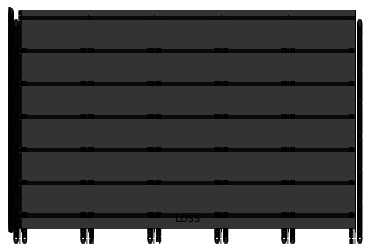

In [97]:
plt.subplots(211)
plt.title('Loss')

# plt.plot(history.history['loss'],label='train')
# plt.plot(history.history['val_loss],label='test')
# plt.legend()
plt.show()

In [ ]:
# mode

# Résultat

In [33]:
test_pic = cv2.imread('12.Emily-Drouet-957649.jpg')
image = cv2.cvtColor(test_pic,cv2.COLOR_BGR2RGB)

In [34]:
test_pic = cv2.resize(image,(128,128))
test_pic

array([[[163, 159, 133],
        [ 95,  92,  92],
        [ 62,  61,  76],
        ...,
        [ 61,  57,  72],
        [ 52,  48,  65],
        [ 53,  48,  70]],

       [[ 79,  72,  87],
        [ 58,  56,  76],
        [103, 121, 134],
        ...,
        [ 63,  59,  75],
        [ 59,  55,  72],
        [ 54,  49,  71]],

       [[ 49,  60,  79],
        [113, 130, 147],
        [ 97, 125, 126],
        ...,
        [ 64,  60,  75],
        [ 57,  53,  70],
        [ 54,  49,  71]],

       ...,

       [[ 50,  52,  81],
        [ 58,  62,  79],
        [100, 106, 112],
        ...,
        [ 38,  53,  73],
        [ 14,  29,  61],
        [ 11,  27,  60]],

       [[ 54,  59,  81],
        [ 85,  91, 107],
        [ 85,  91, 104],
        ...,
        [ 42,  58,  77],
        [ 19,  34,  65],
        [ 14,  30,  63]],

       [[ 83,  88, 107],
        [ 72,  77,  96],
        [ 70,  75,  94],
        ...,
        [ 45,  61,  83],
        [ 27,  42,  73],
        [ 19,  35,  68]]

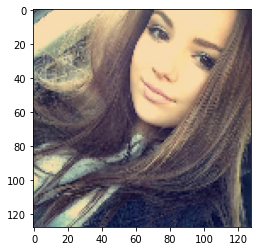

In [35]:
plt.imshow(test_pic)
plt.show()

In [36]:
test_pic = test_pic.reshape((1,128,128,3))
test_pic

array([[[[163, 159, 133],
         [ 95,  92,  92],
         [ 62,  61,  76],
         ...,
         [ 61,  57,  72],
         [ 52,  48,  65],
         [ 53,  48,  70]],

        [[ 79,  72,  87],
         [ 58,  56,  76],
         [103, 121, 134],
         ...,
         [ 63,  59,  75],
         [ 59,  55,  72],
         [ 54,  49,  71]],

        [[ 49,  60,  79],
         [113, 130, 147],
         [ 97, 125, 126],
         ...,
         [ 64,  60,  75],
         [ 57,  53,  70],
         [ 54,  49,  71]],

        ...,

        [[ 50,  52,  81],
         [ 58,  62,  79],
         [100, 106, 112],
         ...,
         [ 38,  53,  73],
         [ 14,  29,  61],
         [ 11,  27,  60]],

        [[ 54,  59,  81],
         [ 85,  91, 107],
         [ 85,  91, 104],
         ...,
         [ 42,  58,  77],
         [ 19,  34,  65],
         [ 14,  30,  63]],

        [[ 83,  88, 107],
         [ 72,  77,  96],
         [ 70,  75,  94],
         ...,
         [ 45,  61,  83],
        

In [37]:
pred = model.predict(test_pic)

In [38]:
pred

array([[20.446602]], dtype=float32)

In [39]:
int(pred)

20